<a href="https://colab.research.google.com/github/Jeetnarekar/KNN-implementation-on-stock-price/blob/main/KNN_implementation_on_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import yfinance as yf

# Example: Fetch TCS (Tata Consultancy Services) stock data
data = yf.download("TCS.NS", start="2011-01-01", end="2025-01-01")

print(data.head())


/tmp/ipython-input-4248370704.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TCS.NS", start="2011-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker          TCS.NS      TCS.NS      TCS.NS      TCS.NS   TCS.NS
Date                                                               
2011-01-03  424.214050  431.137416  422.931939  427.492574  1405042
2011-01-04  419.341766  427.180966  416.905747  426.356752  2502868
2011-01-05  424.543427  427.089359  418.242787  419.524897  3069674
2011-01-06  429.213989  432.987076  422.400496  427.858633  2846720
2011-01-07  418.572662  434.763876  416.924234  430.789341  2532724


In [9]:
data.columns

MultiIndex([( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])

In [10]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2011-01-03,424.214050,431.137416,422.931939,427.492574,1405042
2011-01-04,419.341766,427.180966,416.905747,426.356752,2502868
2011-01-05,424.543427,427.089359,418.242787,419.524897,3069674
2011-01-06,429.213989,432.987076,422.400496,427.858633,2846720
2011-01-07,418.572662,434.763876,416.924234,430.789341,2532724


In [11]:
data.columns = data.columns.droplevel('Ticker')


In [12]:
data.shape


(3450, 5)

In [13]:
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2011-01-03,424.214050,431.137416,422.931939,427.492574,1405042
2011-01-04,419.341766,427.180966,416.905747,426.356752,2502868
2011-01-05,424.543427,427.089359,418.242787,419.524897,3069674
2011-01-06,429.213989,432.987076,422.400496,427.858633,2846720
2011-01-07,418.572662,434.763876,416.924234,430.789341,2532724


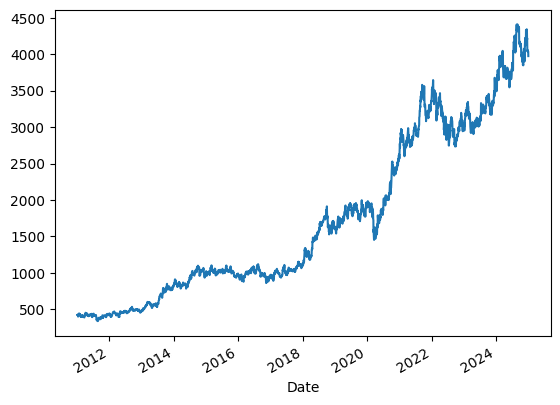

In [14]:
import matplotlib.pyplot as plt
data['Close'].plot()
plt.show()

Classification Porblem : Buy(+1) or Sell(-1) the stock

In [15]:
data['Open-Close'] = data['Open']-data['Close']
data['High-Low'] = data['High']-data['Low']
data.head()


Price,Close,High,Low,Open,Volume,Open-Close,High-Low
Date,,,,,,,
2011-01-03,424.214050,431.137416,422.931939,427.492574,1405042,3.278524,8.205477
2011-01-04,419.341766,427.180966,416.905747,426.356752,2502868,7.014986,10.275219
2011-01-05,424.543427,427.089359,418.242787,419.524897,3069674,-5.018529,8.846572
2011-01-06,429.213989,432.987076,422.400496,427.858633,2846720,-1.355356,10.586580
2011-01-07,418.572662,434.763876,416.924234,430.789341,2532724,12.216679,17.839643


input features to predict whether customer should buy or sell the stock


In [16]:
data = data.dropna()

In [17]:
data.shape

(3450, 7)

In [19]:
X = data[['Open-Close','High-Low']]
X.head()

Price,Open-Close,High-Low
Date,,
2011-01-03,3.278524,8.205477
2011-01-04,7.014986,10.275219
2011-01-05,-5.018529,8.846572
2011-01-06,-1.355356,10.586580
2011-01-07,12.216679,17.839643


Intention is to store +1  for the buy signal and -1 for the sell signal.The variable Y is for classification task

In [20]:
import numpy as np
np.where(data['Close']

(array([   0,    1,    2, ..., 3447, 3448, 3449]),)

In [23]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [24]:
Y

array([-1,  1,  1, ..., -1, -1, -1])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

Implementation of KNN Classifier

In [34]:
from os import access
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find the best parameter
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)
model.fit(X_train,Y_train)
#accuracy score
print(accuracy_score(Y_train,model.predict(X_train)))
print(accuracy_score(Y_test,model.predict(X_test)))

0.7536231884057971
0.49130434782608695


In [33]:
model.best_params_

{'n_neighbors': 2}

In [36]:
predicted_class = model.predict(X_test)
actual_predicted_data = pd.DataFrame({'Actual':Y_test,'Predicted':predicted_class})
actual_predicted_data

,Actual,Predicted
0,1,1
1,1,-1
2,-1,-1
3,1,-1
4,-1,-1
...,...,...
685,1,1
686,-1,-1
687,1,-1
688,1,-1


Regression Problem


In [40]:
from os import access
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Y = data['Close']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=44)

#using gridsearch to find the best parameter
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn,params,cv=5)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)


In [41]:
print(predictions)

[3161.34099664 2737.16467285  757.43752713 2228.41373698 2758.97431098
  484.77272542 1357.51925998 3157.23234049 3327.78396267 1358.68067763
 1389.29838053 1036.22637939  961.04948595  875.82209608  846.60795424
  578.04318915  497.22895304 2987.93059625 1666.22853597 1337.7508884
 2974.28785536 1580.86035834 2650.02901204  718.48328315  736.42690023
 2618.830051   2294.87664117  703.62402344 2084.24393039 1950.70519341
 1586.20585802  747.72864109 2600.95587836 3565.34969076 2894.03613281
  981.75831774 1208.71017795  846.52859836 2771.60682509 2632.68821886
 2919.3266059  1139.53816732 2967.65844727 3095.52055528 3175.09998915
 1346.9924113  2001.83016629 2790.81163194  512.5280287  2222.93156603
 2280.74366591  937.05441623  457.31768799 2259.44544813 1045.46974691
 1814.80128309 2866.73461236  672.25048828 1142.34301419 2307.15070936
 2816.26768663 2697.15642632 1844.41023763 1939.14366319 1539.53948975
  722.36504788 1010.51704237 1187.07563612 2602.86965603  771.97974311
  950.5

In [42]:
from sklearn.metrics import r2_score
r2_score(Y_test,predictions)

0.6377863291270918